In [12]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn import model_selection
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

import time

# Data Preprocessing

In [13]:
cirrhosis = pd.read_csv('cirrhosis.csv', header=0, sep=',')
cirrhosis.head(20)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


In [14]:
import pandas as pd
df=cirrhosis.head()
df1=df.iloc[:,:11]
df2=df.iloc[:,11:]
with open('mytable.tex','w') as tf:
    tf.write(df1.to_latex())
    tf.write(df2.to_latex())


In [15]:
# feature dtypes:
cirrhosis.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

From the data description on kaggle:

Attribute Information

1) ID: unique identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of drug D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: presence of spiders N (No) or Y (Yes)

10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Triglycerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [16]:
# Drop ID as we will not need it for prediction
cirrhosis.drop('ID', axis=1, inplace=True)

# Drop N_Days and Status to prevent data leakage
cirrhosis.drop('N_Days', axis=1, inplace=True)
cirrhosis.drop('Status', axis=1, inplace=True)

In [17]:
def get_percentage_missing(series):
    """ Calculates percentage of NaN values in DataFrame
    :param series: Pandas DataFrame object
    :return: float
    """
    num = series.isnull().sum()
    den = len(series)
    return round(num/den, 2)

# Only include columns that contain any NaN values
df_with_any_null_values = cirrhosis[cirrhosis.columns[cirrhosis.isnull().any()].tolist()]

get_percentage_missing(df_with_any_null_values)

Drug             0.25
Ascites          0.25
Hepatomegaly     0.25
Spiders          0.25
Cholesterol      0.32
Copper           0.26
Alk_Phos         0.25
SGOT             0.25
Tryglicerides    0.33
Platelets        0.03
Prothrombin      0.00
Stage            0.01
dtype: float64

Missing values (from kaggle data description):
    
The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

In [18]:
# Drop rows where target value is missing
cirrhosis=cirrhosis.dropna(subset=['Stage'])

In [19]:
# Proportion of cirrhosis/no cirrhosis
round(len(cirrhosis[cirrhosis['Stage']==4])/len(cirrhosis),2)

0.35

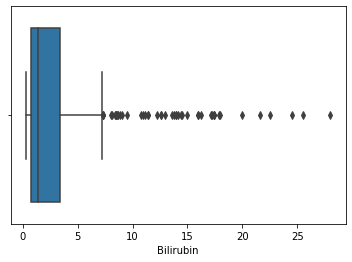

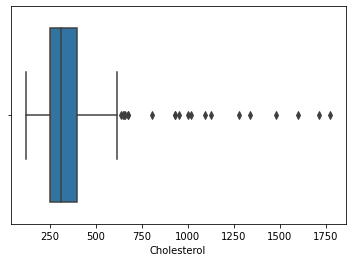

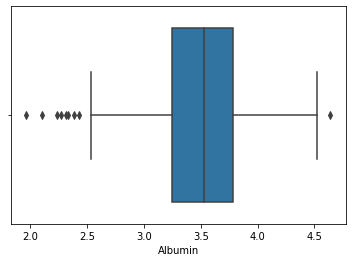

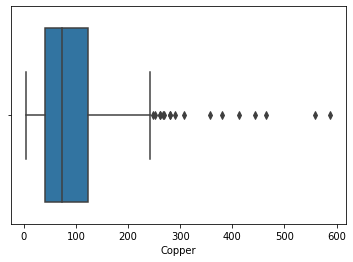

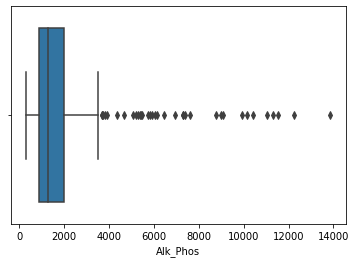

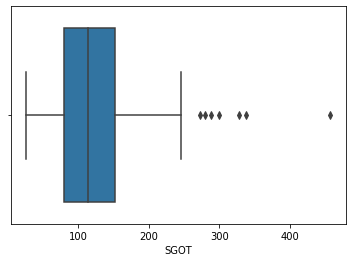

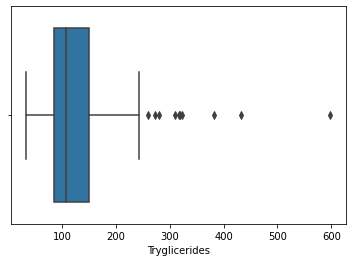

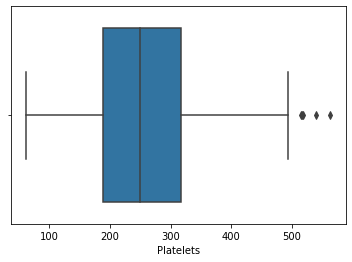

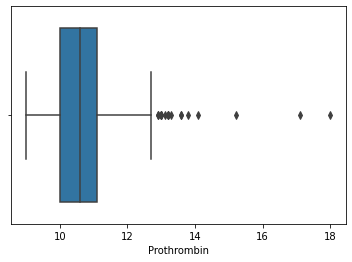

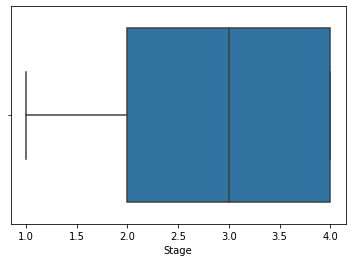

In [20]:
# Outlier detection
float_cols = list(cirrhosis.select_dtypes(include='float64'))

for col in float_cols:
    plt.figure()    
    sns.boxplot(cirrhosis[col])

In [21]:
cirrhosis['SGOT'].argmax()

165

In [22]:
cirrhosis.iloc[165]

Drug             Placebo
Age                15105
Sex                    F
Ascites                N
Hepatomegaly           Y
Spiders                N
Edema                  N
Bilirubin            5.7
Cholesterol       1480.0
Albumin             3.26
Copper              84.0
Alk_Phos          1960.0
SGOT              457.25
Tryglicerides      108.0
Platelets          213.0
Prothrombin          9.5
Stage                2.0
Name: 165, dtype: object

In [23]:
cirrhosis['Tryglicerides'].argmax()

74

In [24]:
cirrhosis.iloc[74]

Drug             D-penicillamine
Age                        15895
Sex                            F
Ascites                        Y
Hepatomegaly                   Y
Spiders                        Y
Edema                          S
Bilirubin                   17.1
Cholesterol                674.0
Albumin                     2.53
Copper                     207.0
Alk_Phos                  2078.0
SGOT                       182.9
Tryglicerides              598.0
Platelets                  268.0
Prothrombin                 11.5
Stage                        4.0
Name: 74, dtype: object

In [25]:
# save the names of the variables with missing values (one for object and one for float columns)

df_with_any_null_values = cirrhosis[cirrhosis.columns[cirrhosis.isnull().any()].tolist()]

obj_cols = list(df_with_any_null_values.select_dtypes(include='object'))
float_cols = list(df_with_any_null_values.select_dtypes(include='float64'))

obj_cols_with_nan = get_percentage_missing(df_with_any_null_values[obj_cols]).keys()
float_cols_with_nan = get_percentage_missing(df_with_any_null_values[float_cols]).keys()

In [26]:
# explore data in categorical columns with missing values to determine how to replace the missing values

for col in obj_cols_with_nan:
    val_counts = {}
    for value in cirrhosis[col].value_counts().keys():
        val_counts[value] = cirrhosis[col].value_counts()[value]
    val_counts['NaN'] = cirrhosis[col].isna().sum()
    print('Value count for', col, ':', val_counts)

Value count for Drug : {'D-penicillamine': 158, 'Placebo': 154, 'NaN': 100}
Value count for Ascites : {'N': 288, 'Y': 24, 'NaN': 100}
Value count for Hepatomegaly : {'Y': 160, 'N': 152, 'NaN': 100}
Value count for Spiders : {'N': 222, 'Y': 90, 'NaN': 100}


Drug: The data was collected in the frameworks of a study testing the drug D-penicillamine. The 100 missing values stem from patients that did not participate in the study but consented to have their data recorded. We thus decided to fill the missing values with an additional class 'No drugs'. 

Ascites: Ascites is a medical condition strongly connected to a malfunctioning of the liver, often caused by cirrhosis. As the ratio of Y to N is quite small, we decided to replace the missing values with 'N'.

Hepatomegaly: (From Wikipedia) [Hepatomegaly is the condition of having an enlarged liver. It is a non-specific medical sign having many causes, which can broadly be broken down into infection, hepatic tumours, or metabolic disorder.] This is a rather un-specific condition, and the proportions of Y and N are almost equal. We decided to drop this predictor all together.

Spiders:(From Wikipedia) [A spider angioma is a type of swollen, spider-like blood vessel on the skin. They are common and often benign, presenting in around 10–15% of healthy adults and young children. However, having more than three spider angiomas is likely to be abnormal and may be a sign of liver disease and/or Hepatitis C.] The proportions of Y and N are in favour of N, but not considerably. However, as spiders seem to be common and not typically a sure-fire indicator of liver disease unless found in high quantities, we decided to fill the missing values with 'N'.

In [27]:
# First try of filling missing values

cirrhosis['Drug'] = cirrhosis['Drug'].fillna('Placebo')
cirrhosis['Ascites'] = cirrhosis['Ascites'].fillna('N')  
cirrhosis.drop('Hepatomegaly', axis=1, inplace=True)
cirrhosis['Spiders'] = cirrhosis['Spiders'].fillna('N')

# Missing float values are all filled with the median
cirrhosis['Cholesterol'] = cirrhosis['Cholesterol'].fillna(cirrhosis['Cholesterol'].median())
cirrhosis['Copper'] = cirrhosis['Copper'].fillna(cirrhosis['Copper'].median())
cirrhosis['Alk_Phos'] = cirrhosis['Alk_Phos'].fillna(cirrhosis['Alk_Phos'].median())
cirrhosis['SGOT'] = cirrhosis['SGOT'].fillna(cirrhosis['SGOT'].median())
cirrhosis['Tryglicerides'] = cirrhosis['Tryglicerides'].fillna(cirrhosis['Tryglicerides'].median())
cirrhosis['Platelets'] = cirrhosis['Platelets'].fillna(cirrhosis['Platelets'].median())
cirrhosis['Prothrombin'] = cirrhosis['Prothrombin'].fillna(cirrhosis['Prothrombin'].median())

In [28]:
cirrhosis.head()

,Drug,Age,Sex,Ascites,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,D-penicillamine,20617,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,D-penicillamine,25594,M,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,D-penicillamine,19994,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,Placebo,13918,F,N,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


We decided to test binary classification on this data set, differentiating between cirrhosis (Stage=4.0) and no cirrhosis (Stage=1.0, 2.0, 3.0) 

In [29]:
# Binary Classification
cirrhosis['Stage'] = np.where(cirrhosis['Stage'] == 4, 1, 0)

In [30]:
# Check that all missing values are gone
df_with_any_null_values = cirrhosis[cirrhosis.columns[cirrhosis.isnull().any()].tolist()]

get_percentage_missing(df_with_any_null_values)

Series([], dtype: float64)

In [31]:
# convert data to be usable in sklearn classifiers
le = LabelEncoder()
obj_cols = cirrhosis.select_dtypes(include=('object')).columns

for col in obj_cols:
    cirrhosis[col] = le.fit_transform(cirrhosis[col])

cirrhosis_y = cirrhosis.iloc[:,-1].values
cirrhosis_X = cirrhosis.iloc[:,:-1]
cirrhosis_X = cirrhosis_X.values

In [32]:
# Create dictionary to compare accuracies and computation time between classifiers
comparison_dict = {}

# First Simple Classifier

## SVM

In [33]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [49]:
C_list = np.logspace(-5,5, num=10, base=10)
kernel_list = ['poly', 'rbf', 'sigmoid']
param_grid = dict(C=C_list, kernel=kernel_list)

clf = GridSearchCV(svm.SVC(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
clf.fit(cirrhosis_X, cirrhosis_y)

print('Best parameters:', clf.best_params_)
print('Train accuracy:', round(clf.score(cirrhosis_X, cirrhosis_y),2))

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf_final = svm.SVC(C=clf.best_params_['C'],kernel=clf.best_params_['kernel'])
    clf_final.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf_final.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf_final.score(X_test, Y_test),2))
    
    acc_train.append(clf_final.score(X_train, Y_train))
    acc_test.append(clf_final.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['SVC'] = [final_acc_test, round(tok-tik,2)]


Best parameters: {'C': 100000.0, 'kernel': 'poly'}
Train accuracy: 0.72
Total k-fold computation time; 54.33


# Dimensionality Reduction

## PCA

Text(0.5, 0, 'Principal Component 1')

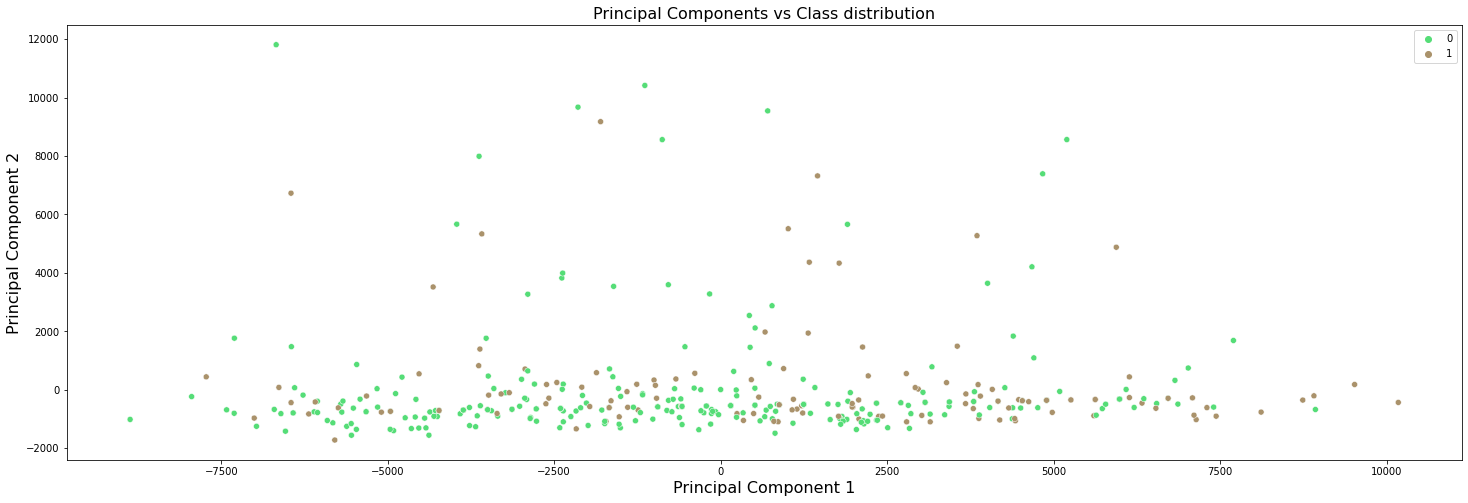

In [ ]:
pca = PCA(n_components=3)
pca.fit(cirrhosis_X)
cirrhosis_X_pca = pca.transform(cirrhosis_X)

plt.figure(figsize=(25,8))
sns.scatterplot(x=cirrhosis_X_pca[:,0], y=cirrhosis_X_pca[:, 1], hue=cirrhosis_y, palette='terrain')
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
#plt.xticks(rotation='vertical')

## Kernel PCA

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

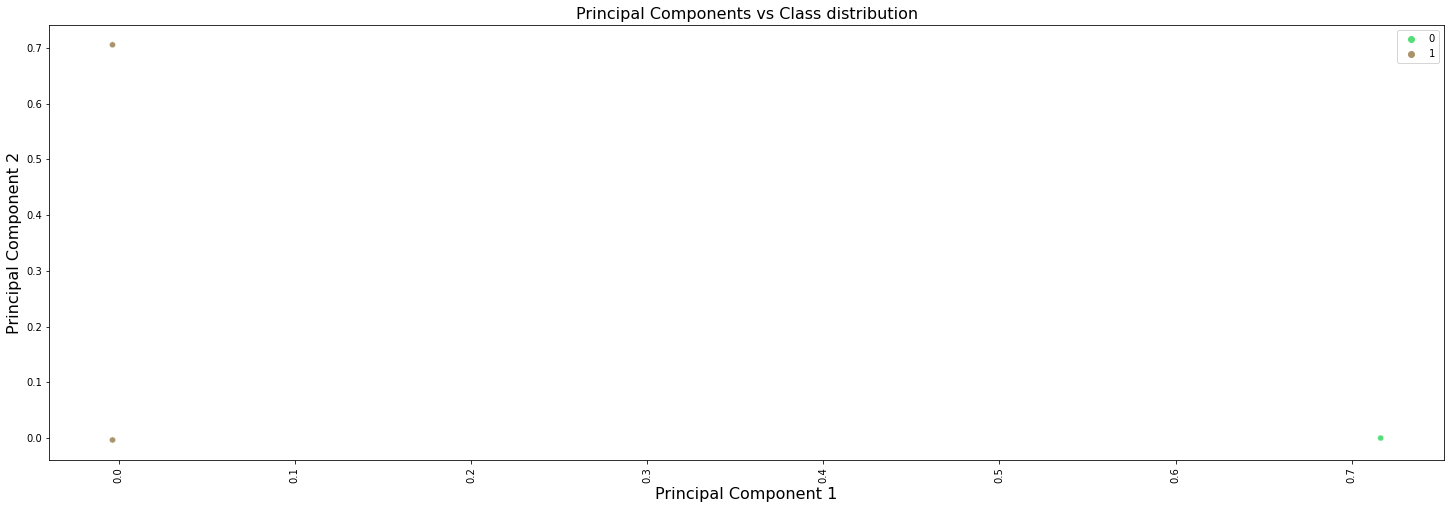

In [ ]:
kernel_pca = KernelPCA(
                n_components=2, kernel='rbf', gamma=1, fit_inverse_transform=True, alpha=0.1
            )
kernel_pca.fit(cirrhosis_X)
cirrhosis_X_pca = kernel_pca.transform(cirrhosis_X)

plt.figure(figsize=(25,8))
sns.scatterplot(x=cirrhosis_X_pca[:,0], y=cirrhosis_X_pca[:, 1], hue=cirrhosis_y, palette='terrain')
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical')

In [ ]:
gamma_list = np.logspace(-5, 5, num=5, base=10)
alpha_list = np.logspace(-5, 2, num=5, base=10)
kernel_list = ['linear', 'rbf', 'cosine']

for gamma in gamma_list:
    for alpha in alpha_list:
        for kernel in kernel_list:    
            kernel_pca = KernelPCA(
                    n_components=2, kernel=kernel, gamma=gamma, fit_inverse_transform=True, alpha=alpha
                )

            kernel_pca.fit(cirrhosis_X)
            cirrhosis_X_kpca = kernel_pca.transform(cirrhosis_X)
            
            fig = plt.figure()
            plt.scatter(cirrhosis_X_kpca[:,0], cirrhosis_X_kpca[:, 1], marker='o', c=cirrhosis_y, s=25, edgecolor='k') 
            plt.title('2-component KPCA on BC with {gamma}, {alpha}, {kernel}'.format(gamma=np.round(gamma,4), alpha=np.round(alpha,4), kernel=kernel))
            plt.xlabel('PC_1')
            plt.ylabel('PC_2')
            plt.show()

## PCA+SVM

In [ ]:
acc_train = []
acc_test = []

C_list = np.logspace(-5, 5, num=10, base=10)
kernel_list = ['poly', 'rbf', 'sigmoid']
param_grid = dict(C=C_list, kernel=kernel_list)

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]

    pca = PCA(n_components=4)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf = GridSearchCV(svm.SVC(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
    #clf = svm.SVC(kernel='rbf', C=500)
    clf.fit(X_train_pca, Y_train)
    
    print('Train accuracy:', round(clf.score(X_train_pca, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test_pca, Y_test),2))
    
    acc_train.append(clf.score(X_train_pca, Y_train))
    acc_test.append(clf.score(X_test_pca, Y_test))
tok = time.time()
    
final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['PCA+SVC'] = [final_acc_test, round(tok-tik,2)]

Train accuracy: 0.66
Test accuracy: 0.67
Train accuracy: 0.7
Test accuracy: 0.61
Train accuracy: 0.69
Test accuracy: 0.61
Train accuracy: 0.7
Test accuracy: 0.62
Train accuracy: 0.7
Test accuracy: 0.65
Average train accuracy over 5 folds: 0.69
Average test accuracy over 5 folds: 0.63
Total k-fold computation time; 1557.3


## Kernel PCA+SVM

In [ ]:
acc_train = []
acc_test = []

C_list = np.logspace(-5, 5, num=10, base=10)
kernel_list = ['poly', 'rbf', 'sigmoid']
param_grid = dict(C=C_list, kernel=kernel_list)

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]

    kernel_pca = KernelPCA(n_components=2, kernel='cosine')
    kernel_pca.fit(X_train)
    X_train_pca = kernel_pca.transform(X_train)
    X_test_pca = kernel_pca.transform(X_test)
    
    clf = GridSearchCV(svm.SVC(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
    clf.fit(X_train_pca, Y_train)
    
    print('Best parameters:', clf.best_params_)
    print('Train accuracy:', round(clf.score(X_train_pca, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test_pca, Y_test),2))
    
    acc_train.append(clf.score(X_train_pca, Y_train))
    acc_test.append(clf.score(X_test_pca, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['KPCA+SVC'] = [final_acc_test, round(tok-tik,2)]

Best parameters: {'C': 1e-05, 'kernel': 'poly'}
Train accuracy: 0.65
Test accuracy: 0.65
Best parameters: {'C': 1e-05, 'kernel': 'poly'}
Train accuracy: 0.65
Test accuracy: 0.65
Best parameters: {'C': 1e-05, 'kernel': 'poly'}
Train accuracy: 0.65
Test accuracy: 0.65
Best parameters: {'C': 1e-05, 'kernel': 'poly'}
Train accuracy: 0.65
Test accuracy: 0.65
Best parameters: {'C': 1e-05, 'kernel': 'poly'}
Train accuracy: 0.65
Test accuracy: 0.66
Average train accuracy over 5 folds: 0.65
Average test accuracy over 5 folds: 0.65
Total k-fold computation time; 616.83


## LDA+SVM

In [39]:
acc_train = []
acc_test = []

C_list = np.logspace(-5, 5, num=10, base=10)
kernel_list = ['poly', 'rbf', 'sigmoid']
param_grid = dict(C=C_list, kernel=kernel_list)

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]

    lda = LinearDiscriminantAnalysis(n_components=1)
    lda.fit(X_train, Y_train)
    X_lda_train = lda.transform(X_train)
    X_lda_test = lda.transform(X_test)
    
    clf = GridSearchCV(svm.SVC(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
    clf.fit(X_lda_train, Y_train)
    
    print('Best parameters:', clf.best_params_)
    print('Train accuracy:', round(clf.score(X_lda_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_lda_test, Y_test),2))
    
    acc_train.append(clf.score(X_lda_train, Y_train))
    acc_test.append(clf.score(X_lda_test, Y_test))

tok = time.time()    
    
final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['LDA+SVC'] = [final_acc_test, round(tok-tik,2)]

plt.figure()
plt.scatter(X_lda_train[Y_train==0, 0], X_lda_train[Y_train == 0, 0])
plt.scatter(X_lda_train[Y_train==1, 0], X_lda_train[Y_train == 1, 0])
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA seperation")
plt.show()

## QDA+SVM

In [ ]:
acc_train = []
acc_test = []

reg_list = np.logspace(-4, 1, num=5, base=10)
tol_list = np.logspace(-4, 1, num=5, base=10)
param_grid = dict(tol=tol_list, reg_param=reg_list)

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf = GridSearchCV(QuadraticDiscriminantAnalysis(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
    clf.fit(X_train,Y_train)
    
    print('Train accuracy:', round(clf.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test, Y_test),2))
    
    acc_train.append(clf.score(X_train, Y_train))
    acc_test.append(clf.score(X_test, Y_test))
tok = time.time()

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['QDA+SVC'] = [final_acc_test, round(tok-tik,2)]

Train accuracy: 0.75
Test accuracy: 0.71
Train accuracy: 0.76
Test accuracy: 0.69
Train accuracy: 0.78
Test accuracy: 0.72
Train accuracy: 0.77
Test accuracy: 0.77
Train accuracy: 0.78
Test accuracy: 0.65
Average train accuracy over 5 folds: 0.77
Average test accuracy over 5 folds: 0.71
Total k-fold computation time; 0.42


# Boosting

## AdaBoost

In [52]:
n_estimator_list = [5, 10, 20, 50, 70, 100, 150, 200]
lr_list = [0.01, 0.1, 0.3, 0.5, 1, 2, 5, 10, 100]
param_grid = dict(n_estimators=n_estimator_list, learning_rate=lr_list)

clf = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
clf.fit(cirrhosis_X, cirrhosis_y)

print('Best parameters:', clf.best_params_)
print('Train accuracy:', round(clf.score(cirrhosis_X, cirrhosis_y),2))

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf_final = AdaBoostClassifier( n_estimators=clf.best_params_['n_estimators'],
                                    learning_rate=clf.best_params_['learning_rate'])
    clf_final.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf_final.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf_final.score(X_test, Y_test),2))
    
    acc_train.append(clf_final.score(X_train, Y_train))
    acc_test.append(clf_final.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['AdaBoost'] = [final_acc_test, round(tok-tik,2)]

Best parameters: {'learning_rate': 0.3, 'n_estimators': 10}
Train accuracy: 0.77
Train accuracy: 0.75
Test accuracy: 0.75
Train accuracy: 0.78
Test accuracy: 0.71
Train accuracy: 0.78
Test accuracy: 0.7
Train accuracy: 0.76
Test accuracy: 0.78
Train accuracy: 0.78
Test accuracy: 0.66
Average train accuracy over 5 folds: 0.77
Average test accuracy over 5 folds: 0.72
Total k-fold computation time; 0.22


## XGBoost

In [ ]:
max_depth_list = [2, 3, 4, 5, 10, 15]
lr_list = [0.1, 0.3, 0.5, 0.75, 1, 2]
param_grid = dict(max_depth=max_depth_list, learning_rate=lr_list)

clf = GridSearchCV(XGBClassifier(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
clf.fit(cirrhosis_X, cirrhosis_y)

print('Best parameters:', clf.best_params_)
print('Train accuracy:', round(clf.score(cirrhosis_X, cirrhosis_y),2))

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf_final = XGBClassifier(  max_depth=clf.best_params_['max_depth'],
                                learning_rate=clf.best_params_['learning_rate'])
    clf_final.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf_final.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf_final.score(X_test, Y_test),2))
    
    acc_train.append(clf_final.score(X_train, Y_train))
    acc_test.append(clf_final.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['XGBoost'] = [final_acc_test, round(tok-tik,2)]

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
clf.predict(X_test)

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0])

# Various other methods

## KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

n_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
param_grid = dict(n_neighbors=n_list)

clf = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
clf.fit(cirrhosis_X, cirrhosis_y)

print('Best parameters:', clf.best_params_)
print('Train accuracy:', round(clf.score(cirrhosis_X, cirrhosis_y),2))

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf_final = KNeighborsClassifier( n_neighbors=clf.best_params_['n_neighbors'])
    clf_final.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf_final.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf_final.score(X_test, Y_test),2))
    
    acc_train.append(clf_final.score(X_train, Y_train))
    acc_test.append(clf_final.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['KNeighbors'] = [final_acc_test, round(tok-tik,2)]

Best parameters: {'n_neighbors': 3}
Train accuracy: 0.79
Train accuracy: 0.81
Test accuracy: 0.64
Train accuracy: 0.81
Test accuracy: 0.55
Train accuracy: 0.79
Test accuracy: 0.62
Train accuracy: 0.79
Test accuracy: 0.61
Train accuracy: 0.77
Test accuracy: 0.66
Average train accuracy over 5 folds: 0.79
Average test accuracy over 5 folds: 0.62
Total k-fold computation time; 0.5


## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf=MLPClassifier(hidden_layer_sizes=(32,32),activation="tanh",solver="sgd",
                      learning_rate='adaptive', learning_rate_init=0.001,
                      n_iter_no_change=10,max_iter=1000,alpha=0.0001)
    clf.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test, Y_test),2))
    
    acc_train.append(clf.score(X_train, Y_train))
    acc_test.append(clf.score(X_test, Y_test))
tok = time.time()

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['NN'] = [final_acc_test, round(tok-tik,2)]

Train accuracy: 0.65
Test accuracy: 0.64
Train accuracy: 0.65
Test accuracy: 0.65
Train accuracy: 0.65
Test accuracy: 0.65
Train accuracy: 0.65
Test accuracy: 0.65
Train accuracy: 0.65
Test accuracy: 0.66
Average train accuracy over 5 folds: 0.65
Average test accuracy over 5 folds: 0.65
Total k-fold computation time; 0.45


## Gaussian Naive Bayes

In [56]:
acc_train = []
acc_test = []
              
tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test, Y_test),2))
    
    acc_train.append(clf.score(X_train, Y_train))
    acc_test.append(clf.score(X_test, Y_test))
tok = time.time()

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['Gaussian_Naive_Bayes'] = [final_acc_test, round(tok-tik,2)]

Train accuracy: 0.72
Test accuracy: 0.71
Train accuracy: 0.74
Test accuracy: 0.71
Train accuracy: 0.73
Test accuracy: 0.73
Train accuracy: 0.74
Test accuracy: 0.79
Train accuracy: 0.75
Test accuracy: 0.71
Average train accuracy over 5 folds: 0.74
Average test accuracy over 5 folds: 0.73
Total k-fold computation time; 0.05


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

max_depth_list =  [2,5,10,20,50,100]
n_estimators_list=[10,50,100,200,500]
param_grid = dict(max_depth=max_depth_list,
                  n_estimators=n_estimators_list)

clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, refit=True, cv=5)
clf.fit(cirrhosis_X, cirrhosis_y)

print('Best parameters:', clf.best_params_)
print('Train accuracy:', round(clf.score(cirrhosis_X, cirrhosis_y),2))

acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
    X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf_final = RandomForestClassifier( max_depth=clf.best_params_['max_depth'],
                                        n_estimators=clf.best_params_['n_estimators'])
    clf_final.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf_final.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf_final.score(X_test, Y_test),2))
    
    acc_train.append(clf_final.score(X_train, Y_train))
    acc_test.append(clf_final.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['Random_Forest'] = [final_acc_test, round(tok-tik,2)]

Best parameters: {'max_depth': 10, 'n_estimators': 50}
Train accuracy: 0.98
Train accuracy: 0.98
Test accuracy: 0.75
Train accuracy: 0.99
Test accuracy: 0.72
Train accuracy: 0.98
Test accuracy: 0.72
Train accuracy: 0.99
Test accuracy: 0.76
Train accuracy: 1.0
Test accuracy: 0.74
Average train accuracy over 5 folds: 0.99
Average test accuracy over 5 folds: 0.74
Total k-fold computation time; 1.12


# Feature Selection

## Using the Random Forest from above

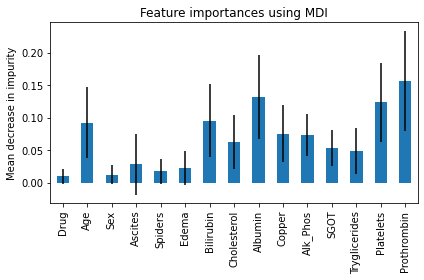

In [65]:
feature_names=cirrhosis.drop(columns="Stage").columns.values
importances = clf_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_final.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


In [ ]:
cirrhosis_X_red=cirrhosis_X[:,[1,6,8,13,14]]
cirrhosis_X_red=cirrhosis_X[:,[1,6,7,8,9,10,11,12,13,14]]

In [ ]:
acc_train = []
acc_test = []

tik = time.time()
for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X_red, cirrhosis_y)):
    X_train, X_test = cirrhosis_X_red[train_ids], cirrhosis_X_red[test_ids]
    Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
    
    clf = XGBClassifier(max_depth=2, learning_rate=0.1)
    clf.fit(X_train, Y_train)
    
    print('Train accuracy:', round(clf.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test, Y_test),2))
    
    acc_train.append(clf.score(X_train, Y_train))
    acc_test.append(clf.score(X_test, Y_test))
tok = time.time()    

final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)
print('Total k-fold computation time;', round(tok-tik, 2))
comparison_dict['Random_Forest_Feature_Selection'] = [final_acc_test, round(tok-tik,2)]

[18:28:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.86
Test accuracy: 0.83
[18:28:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.87
Test accuracy: 0.75
[18:28:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.88
Test accuracy: 0.72
[18:28:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the object

## Feature Selection with LASSO

In [ ]:
alpha_list = [k*10**(-i) for i in reversed(range(6)) for k in [1,3,5,8]]

acc_train = []
acc_test = []
selected_features = []

tik = time.time()
for alpha in alpha_list:
    print('alpha:', alpha)
    clf_lasso = Lasso(alpha=alpha)
    acc_train_alpha = []
    acc_test_alpha = []
    for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
        X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
        Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
        
        clf_lasso.fit(X_train, Y_train)
        
        support = (clf_lasso.coef_!=0.0)
        print('New shape of train data for fold',fold, ':', X_train[:, support].shape)
        selected_features.append([i for i, val in enumerate(support) if val])
        
        preds_lasso_train = (clf_lasso.predict(X_train)>0.5)
        acc_train_alpha.append(round(((Y_train==preds_lasso_train).sum()/len(Y_train)),2))
        preds_lasso_test = (clf_lasso.predict(X_test)>0.5)
        acc_test_alpha.append(round(((Y_test==preds_lasso_test).sum()/len(Y_test)),2))
        
    acc_train.append(np.mean(acc_train_alpha))
    acc_test.append(np.mean(acc_test_alpha))

tok = time.time()
selected_features=sum(selected_features, [])

alpha: 1e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 3.0000000000000004e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 5e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 8e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (

Text(0.5, 1.0, 'Test accuracy with Logistic Regression+LASSO Feature Selection')

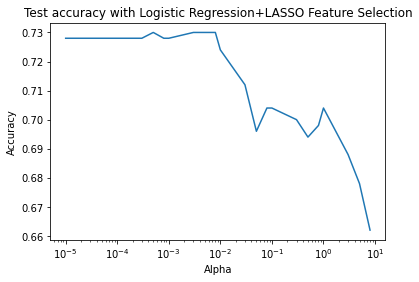

In [ ]:
plt.plot(alpha_list, acc_test)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Test accuracy with Logistic Regression+LASSO Feature Selection')

In [ ]:
print('Maximal test accuracy with Logistic Regression + LASSO:', round(np.max(acc_test),2), 'achieved at alpha =', alpha_list[np.argmax(acc_test)])
comparison_dict['Lasso']=[round(np.max(acc_test),2), round(tok-tik,2)]

Maximal test accuracy with Logistic Regression + LASSO: 0.73 achieved at alpha = 0.0005


Most frequently selected features: [ 7  9 10 13  1]


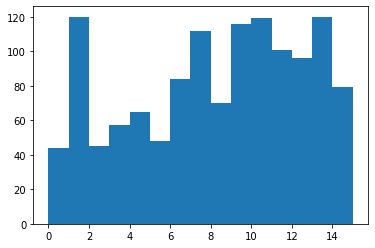

In [ ]:
y, x, _ = plt.hist(selected_features, bins=range(16))
print('Most frequently selected features:', np.argpartition(y, -5)[-5:])

## Feature Selection LASSO+SVC

In [ ]:
C_list = [k*10**(i) for i in range(-2,4) for k in [1,3,5,8]]

acc_train = []
acc_test = []
selected_features = []

tik = time.time()
for C in C_list:
    print('C:', C)
    clf_svc = LinearSVC(C=C, penalty='l1', dual=False)
    acc_train_C = []
    acc_test_C = []
    
    for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
        X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
        Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
        
        clf_svc.fit(X_train, Y_train)
        
        support = (clf_svc.coef_!=0.0).flatten()
        print('New shape of train data for fold',fold, ':', X_train[:, support].shape)
        selected_features.append([i for i, val in enumerate(support) if val])
        
        preds_lasso_train = (clf_svc.predict(X_train)>0.5)
        acc_train_alpha.append(round(((Y_train==preds_lasso_train).sum()/len(Y_train)),2))
        preds_lasso_test = (clf_svc.predict(X_test)>0.5)
        acc_test_alpha.append(round(((Y_test==preds_lasso_test).sum()/len(Y_test)),2))
        
    acc_train.append(np.mean(acc_train_alpha))
    acc_test.append(np.mean(acc_test_alpha))

tok = time.time()
    
selected_features=sum(selected_features, [])

C: 0.01
New shape of train data for fold 0 : (329, 7)
New shape of train data for fold 1 : (329, 7)
New shape of train data for fold 2 : (330, 8)
New shape of train data for fold 3 : (330, 9)
New shape of train data for fold 4 : (330, 7)
C: 0.03
New shape of train data for fold 0 : (329, 11)
New shape of train data for fold 1 : (329, 11)
New shape of train data for fold 2 : (330, 11)
New shape of train data for fold 3 : (330, 10)
New shape of train data for fold 4 : (330, 10)
C: 0.05
New shape of train data for fold 0 : (329, 12)
New shape of train data for fold 1 : (329, 11)
New shape of train data for fold 2 : (330, 11)
New shape of train data for fold 3 : (330, 11)
New shape of train data for fold 4 : (330, 11)
C: 0.08
New shape of train data for fold 0 : (329, 12)
New shape of train data for fold 1 : (329, 11)
New shape of train data for fold 2 : (330, 11)
New shape of train data for fold 3 : (330, 11)
New shape of train data for fold 4 : (330, 11)
C: 0.1
New shape of train data fo

Text(0.5, 1.0, 'Test accuracy with LASSO+SVC Feature Selection')

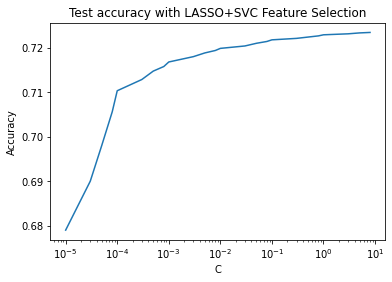

In [ ]:
plt.plot(alpha_list, acc_test)
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Test accuracy with LASSO+SVC Feature Selection')

In [ ]:
print('Maximal test accuracy with Linear SVM + LASSO:', np.max(acc_test), 'achieved at C =', alpha_list[np.argmax(acc_test)])
comparison_dict['Lasso+LinearSVC']=[round(np.max(acc_test),2), round(tok-tik,2)]

Maximal test accuracy with Linear SVM + LASSO: 0.72344 achieved at C = 8


Most frequently selected features: [13 10  1  9  7]


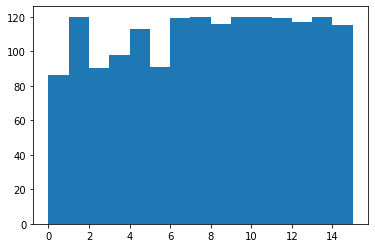

In [ ]:
y, x, _ = plt.hist(selected_features, bins=range(16))
print('Most frequently selected features:', np.argpartition(y, -5)[-5:])

## Feature Selection ElasticNet

In [ ]:
alpha_list = [k*10**(-i) for i in reversed(range(6)) for k in [1,3,5,8]]

acc_train = []
acc_test = []
selected_features = []

tik = time.time()
for alpha in alpha_list:
    print('alpha:', alpha)
    clf_en = ElasticNet(alpha=alpha, l1_ratio=0.7)
    acc_train_alpha = []
    acc_test_alpha = []
    for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X, cirrhosis_y)):
        X_train, X_test = cirrhosis_X[train_ids], cirrhosis_X[test_ids]
        Y_train, Y_test = cirrhosis_y[train_ids], cirrhosis_y[test_ids]
        
        clf_en.fit(X_train, Y_train)
        
        support = (clf_en.coef_!=0.0)
        print('New shape of train data for fold',fold, ':', X_train[:, support].shape)
        selected_features.append([i for i, val in enumerate(support) if val])
        
        preds_lasso_train = (clf_en.predict(X_train)>0.5)
        acc_train_alpha.append(round(((Y_train==preds_lasso_train).sum()/len(Y_train)),2))
        preds_lasso_test = (clf_en.predict(X_test)>0.5)
        acc_test_alpha.append(round(((Y_test==preds_lasso_test).sum()/len(Y_test)),2))
        
    acc_train.append(np.mean(acc_train_alpha))
    acc_test.append(np.mean(acc_test_alpha))
tok = time.time()

selected_features=sum(selected_features, [])

alpha: 1e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 3.0000000000000004e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 5e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (330, 15)
alpha: 8e-05
New shape of train data for fold 0 : (329, 15)
New shape of train data for fold 1 : (329, 15)
New shape of train data for fold 2 : (330, 15)
New shape of train data for fold 3 : (330, 15)
New shape of train data for fold 4 : (

Text(0.5, 1.0, 'Test accuracy with ElasticNet Feature Selection')

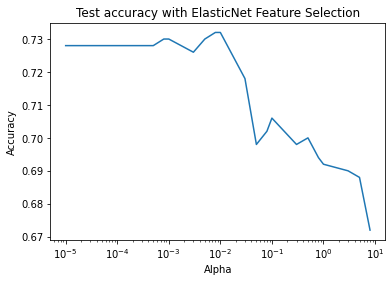

In [ ]:
plt.plot(alpha_list, acc_test)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Test accuracy with ElasticNet Feature Selection')

In [ ]:
print('Maximal test accuracy with Elastic Net:', np.max(acc_test), 'achieved at alpha =', alpha_list[np.argmax(acc_test)])
comparison_dict['Elasticnet']=[round(np.max(acc_test),2), round(tok-tik,2)]

Maximal test accuracy with Elastic Net: 0.732 achieved at alpha = 0.008


Most frequently selected features: [ 7 13  1  9 10]


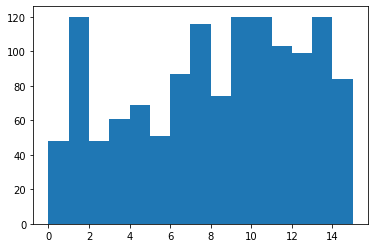

In [ ]:
y, x, _ = plt.hist(selected_features, bins=range(16))
print('Most frequently selected features:', np.argpartition(y, -5)[-5:])

There seems to be a strong consensus on the most important features: 1, 7, 9, 10, 13 which are (in order) Age, Cholesterol, Copper, Alk-Phos, Prothrombin

# Ensemble Methods

## Majority Vote on XGBoost

To improve upon the performance of XGBoost, we train XGBoost on five different training sets and collect the five classifiers. We then use a majority vote on all five trained classifiers and test its performance on a seperate test set that the models never saw during training.

In [ ]:
# Train-Test-Split to be used in majority vote
cirrhosis_X_train, cirrhosis_X_test, cirrhosis_y_train, cirrhosis_y_test = train_test_split(cirrhosis_X, cirrhosis_y, test_size=0.2, random_state=1)

In [ ]:
acc_train = []
acc_test = []

max_depth_list = [2, 3, 4, 5, 10, 15, 20, 50, 100, 200]
lr_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

model_list = []

for fold, (train_ids, test_ids) in enumerate(kfold.split(cirrhosis_X_train, cirrhosis_y_train)):
    X_train, X_test = cirrhosis_X_train[train_ids], cirrhosis_X_train[test_ids]
    Y_train, Y_test = cirrhosis_y_train[train_ids], cirrhosis_y_train[test_ids]
    
    clf = XGBClassifier(max_depth=2, eta=0.1)
    clf.fit(X_train, Y_train)
    model_list.append(clf)
    
    print('Train accuracy:', round(clf.score(X_train, Y_train),2))
    print('Test accuracy:', round(clf.score(X_test, Y_test),2))
    
    acc_train.append(clf.score(X_train, Y_train))
    acc_test.append(clf.score(X_test, Y_test))
final_acc_test = round(np.mean(acc_test),2)
final_acc_train = round(np.mean(acc_train),2)

print('Average train accuracy over 5 folds:', final_acc_train)
print('Average test accuracy over 5 folds:', final_acc_test)

[18:32:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.91
Test accuracy: 0.7
[18:32:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.91
Test accuracy: 0.73
[18:32:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy: 0.89
Test accuracy: 0.8
[18:32:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

In [ ]:
majority_vote = []
for i in range(len(cirrhosis_y_test)):
    proportions = 0
    for model in model_list:
        proportions += model.predict(cirrhosis_X_test)[i]
    proportions/=5
    majority_vote.append(int(proportions>=3/5))
majority_vote = np.asarray(majority_vote)

In [62]:
comparison_dict['MajorityVoteXGB'] = [round(sum(majority_vote==cirrhosis_y_test)/len(cirrhosis_y_test),2), 'None']
print('Accuracy on seperate test set of majority vote:', comparison_dict['MajorityVoteXGB'][0])

Accuracy on seperate test set of majority vote: 0.77


In [63]:
cirrhosis_y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [64]:
majority_vote

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

## Ensemble Vote Classifier on XGBoost

This is a precoded implementation of the majority vote, allowing for weight adjustments of each model. We obtain our best predictions yet.

https://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/

In [65]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=model_list, weights=[1,1,2,1,0.5])
eclf.fit(cirrhosis_X_train, cirrhosis_y_train)
eclf.predict(cirrhosis_X_test)
eclf.score(cirrhosis_X_test, cirrhosis_y_test)
comparison_dict['ECLF_XGBoost'] = [round(eclf.score(cirrhosis_X_test, cirrhosis_y_test),2), 'None']
print('Accuracy on seperate test set of majority vote:', comparison_dict['ECLF_XGBoost'][0])

[18:33:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:33:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [66]:
cirrhosis_y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [67]:
eclf.predict(cirrhosis_X_test)

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

# Comparison of the Methods

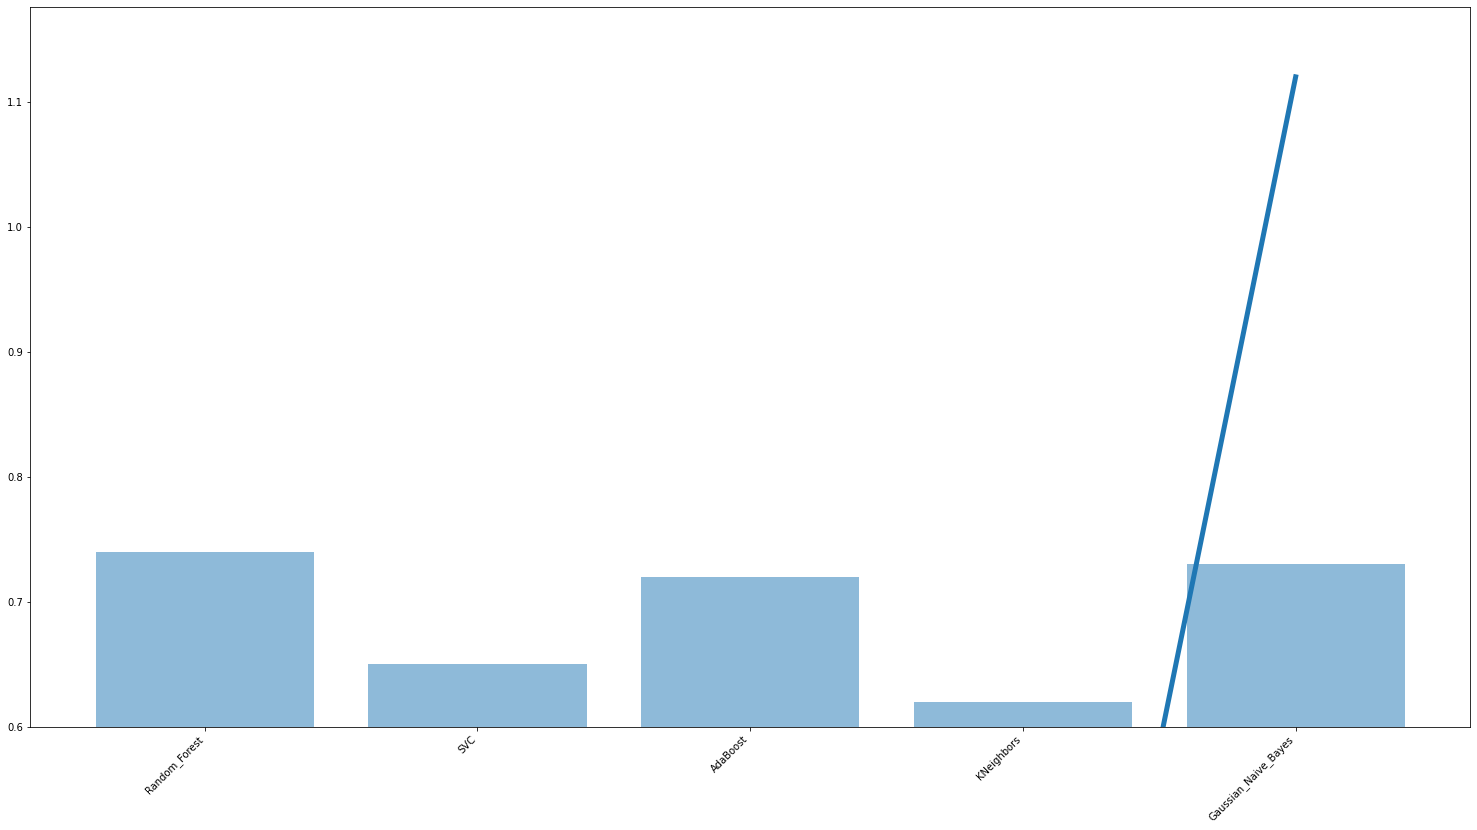

In [86]:
##Add second y-axis

fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
dict_sort=dict(sorted(comparison_dict.items(), key=lambda item: item[1][0]))
methods = list(comparison_dict.keys())
accuracies = [item[0] for item in comparison_dict.values()]
times = [item[1] for item in dict_sort.values()]
ax.bar(methods, accuracies,alpha=.5)
ax.plot(methods, times,lw=5)
plt.ylim(0.6)
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 1440x720 with 0 Axes>

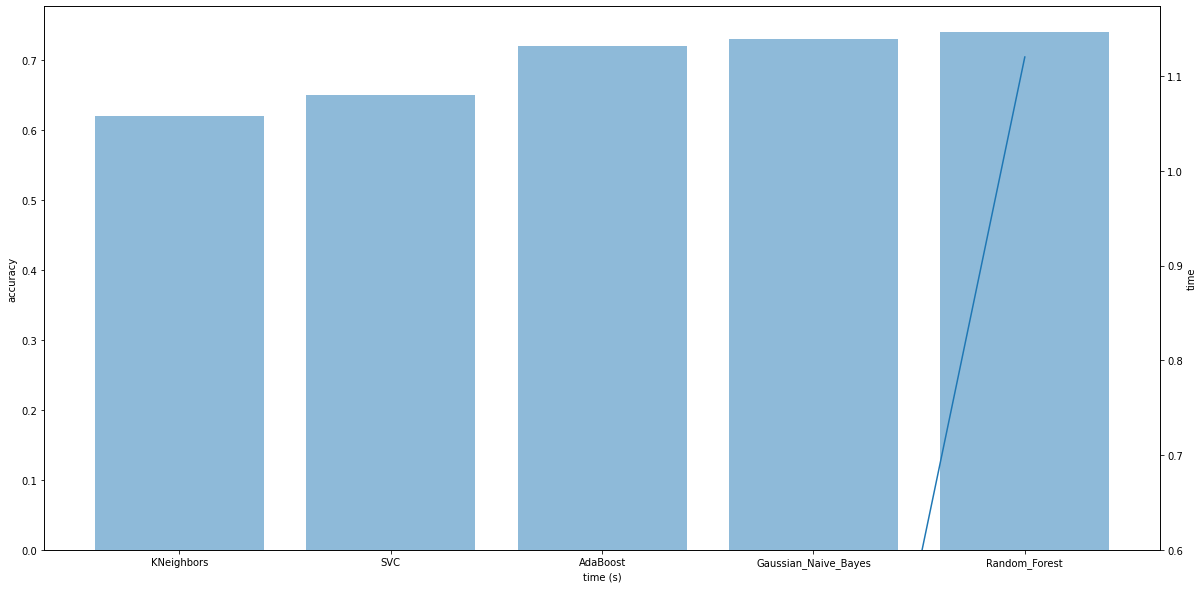

In [84]:
fig = plt.figure(figsize=(20, 10))
fig, ax1 = plt.subplots(figsize=(20,10))
dict_sort=dict(sorted(comparison_dict.items(), key=lambda item: item[1][0]))
methods = list(dict_sort.keys())
accuracies = [item[0] for item in dict_sort.values()]
times = [item[1] for item in dict_sort.values()]
ax1.bar(methods, accuracies,alpha = 0.5)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('accuracy')
ax1.tick_params(axis='y')

ax2 = ax1.twinx() 
ax2.set_ylabel('time')  
ax2.plot(methods,times)
ax2.tick_params(axis='y')
plt.ylim(0.6)
plt.xticks(rotation=45, ha="right")
plt.show()